In [ ]:
# This notebook has been modified (cleaned up) from the exact version used in the thesis,
# and verified to work with versions seen in the end.

In [ ]:
import matplotlib.pyplot as plt
'exec %matplotlib inline'
import numpy as np
import inspect

from qiskit import IBMQ, BasicAer, transpile
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.circuit.library import MCMT
from qiskit.providers.ibmq.managed import IBMQJobManager

from qiskit.tools.visualization import plot_histogram, plot_gate_map, plot_circuit_layout
from qiskit.tools.monitor import job_monitor

In [39]:
def create_circuits(n, s):
    q = QuantumRegister(2*n, name='q')
    c = ClassicalRegister(n, name='c')
    qc = QuantumCircuit(q,c)
    
    # Prepare qubits in first register
    for i in range(n):
        qc.h(i)
    qc.barrier()
    # Oracle
    cnot = [] # find all nonzero qubits in register
    for i in range(n):
        qc.cx(i,n+i)
        if s[i] != '0':
            cnot.append(i)
    for i in cnot:
        qc.cx(cnot[0],n+i) # second CNOT using the first nonzero as control for all operations
    qc.barrier()
    
    # Final Hadamard before measuring
    for i in range(n):
        qc.h(i)
    
    for i in range(n):
        qc.measure(i,i)
    return qc

In [40]:
circs = []
s = '0000'
n = len(str(s))

circs.append(create_circuits(n, s))
s = '1010'
n = len(str(s))
circs.append(create_circuits(n, s))

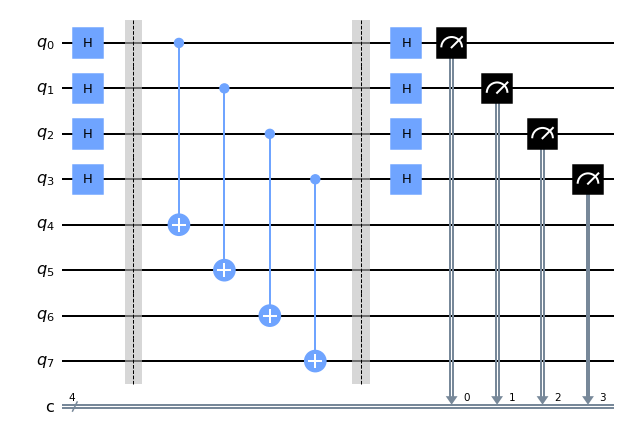

In [41]:
circs[0].draw()

In [42]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-05-26 19:27:27,801: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [43]:

provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_16_melbourne')
name = 'Simon\'s algorithm ' + str(n) + ' qubits'
inspect.signature(transpile)
circs = transpile(circs, backend=backend, optimization_level=3)

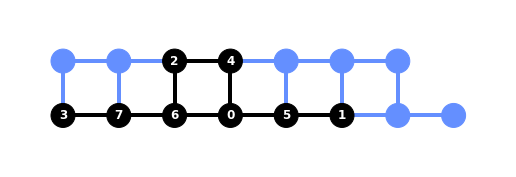

In [44]:
plot_circuit_layout(circs[0], backend)

In [45]:
# Use the transpiler for the circuit 
shots = 8192

job_manager = IBMQJobManager()
jobs = job_manager.run(circs, backend=backend, name=name, shots=shots)

In [48]:
jobs.statuses()

[<JobStatus.QUEUED: 'job is queued'>]

In [55]:
# Local simulator
backend_sim = BasicAer.get_backend('qasm_simulator')
simulations = execute(circs, backend=backend_sim, shots=8192)

In [56]:
# Store all results
exp_results = jobs.results()

one_to_one_exp_result = exp_results.get_counts(0)
two_to_one_exp_result = exp_results.get_counts(1)

one_to_one_sim_result = simulations.result().get_counts(0)
two_to_one_sim_result = simulations.result().get_counts(1)

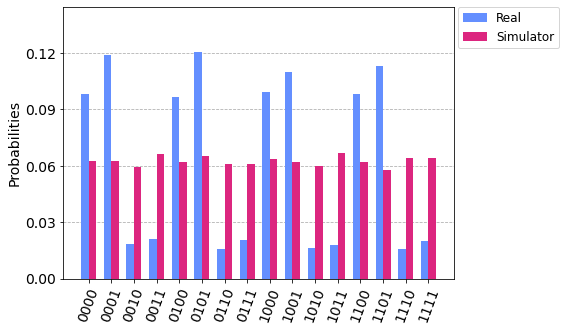

In [57]:
# One-to-one

legend = ['Real', 'Simulator']
plot_histogram([one_to_one_exp_result, one_to_one_sim_result], legend=legend, bar_labels=False)

In [58]:
print(one_to_one_exp_result)

{'0000': 802, '0001': 973, '0010': 153, '0011': 173, '0100': 790, '0101': 986, '0110': 131, '0111': 167, '1000': 812, '1001': 900, '1010': 133, '1011': 147, '1100': 805, '1101': 925, '1110': 131, '1111': 164}


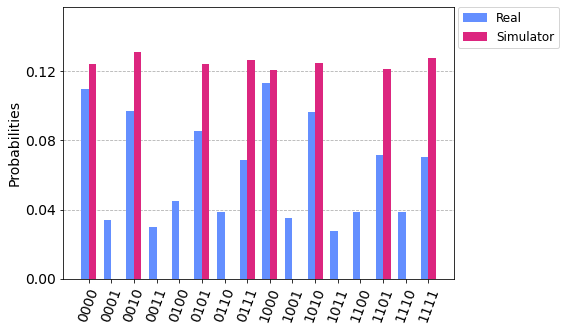

In [59]:
# Two-to-one

legend = ['Real', 'Simulator']
plot_histogram([two_to_one_exp_result, two_to_one_sim_result], legend=legend, bar_labels=False)

In [54]:
print(two_to_one_exp_result)

{'0000': 898, '0001': 276, '0010': 793, '0011': 246, '0100': 369, '0101': 699, '0110': 316, '0111': 563, '1000': 930, '1001': 289, '1010': 792, '1011': 227, '1100': 318, '1101': 584, '1110': 317, '1111': 575}


In [38]:
import qiskit
for i in qiskit.__qiskit_version__.items():
    print(i)

('qiskit-terra', '0.17.1')
('qiskit-aer', '0.8.1')
('qiskit-ignis', '0.6.0')
('qiskit-ibmq-provider', '0.12.3')
('qiskit-aqua', '0.9.1')
('qiskit', '0.25.2')
('qiskit-nature', None)
('qiskit-finance', None)
('qiskit-optimization', None)
('qiskit-machine-learning', None)
